In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [2]:
# def crossparsing
def cp(C,D):
    cend=[]
    a=-1
    b=-1
    m=-1
    n=-1
    target=-1
    if C==''or D=='':
        s=1   
    else:
        for i in range(len(C)):
            t=1
            for j in range(len(D)):
                if C[i]== D[j]:
                    a=i
                    b=j
                    m=a
                    n=b
                while m < len(C) and n<len(D) and C[a:m+1]==D[b:n+1]:
                    m=m+1
                    n=n+1
                long=m-a
                if long >= t:
                    t = long
                    target = m
            
            x=target-1
            y=n-1
            if b <len(D) and C[i]==D[b] :
                cend.append(x)
            else:
                cend.append(i)
        s_AB = len(set(cend))
        z = C.find(D);
        if z!=-1:
            ss=s_AB-1;
        else:
            ss = s_AB
        s=ss/len(C)    
    return s

In [3]:
# def distance the measurement criteria
def distCPD(C,D):
    s1 = cp(C,D);
    s2 = cp(D,C);
    dist = 0.5*(s1+s2);
    return dist

In [4]:
def toInt(list):
    result = []
    for i in range(len(list)):
        b = int(list[i])
        result.append(b)
    return result

In [5]:
def getDistance(list_text1, list_text2):
    dist = []
    if len(list_text1)!=len(list_text2):
        return("error")
    n = len(list_text1)
    for i in range(n):
        d = distCPD(list_text1[i],list_text2[i])
        dist.append(d)
    return dist

In [6]:
def prediction(dist_list, threshold):
    pre_list = [0]*len(dist_list)
    for i in range(len(dist_list)):
        if dist_list[i]<threshold:
            pre_list[i] = 1
    return pre_list

abt_buy

In [7]:
abt_buy_train = pd.read_csv("C:/project/final_data/abt_buy/train.tsv", sep="\t")
abt_buy_train

,idx,text_left,text_right,label
0,0,lg 24 ' lds4821ww semi integrated built in whi...,lg ldf6920bb fully integrated dishwasher,0
1,1,speck seethru clear hard shell case for macboo...,speck products seethru case for apple 13 ' mac...,0
2,2,denon blu-ray disc dvd/cd player dvd3800bdci 1...,denon dvd-2930ci dvd player dvd2930ci dvd + rw...,0
3,3,panasonic dect 6.0 expandable digital cordless...,panasonic kx-tg1032s dual handset digital cord...,0
4,4,sony silver minidv handycam camcorder dcrhc52 ...,sony minidv head cleaner dvm12cld head cleaner,0
...,...,...,...,...
5738,5738,sony silver cyber-shot digital camera dscw170 ...,sony cyber-shot dsc-w300 digital camera 13.6 m...,0
5739,5739,panasonic nnsd377s stainless steel countertop ...,panasonic nn-c994s genius prestige convection ...,0
5740,5740,omnimount 42 ' 63 ' wishbone cantilever extra ...,sanus visionmount flat panel tv wall mount mf1...,0
5741,5741,samsung black dvd/vhs combo recorder dvdvr375 ...,samsung dvd-v9800 dvd/vcr combo player w / 108...,0


In [8]:
abt_buy_test = pd.read_csv("C:/project/final_data/abt_buy/test.tsv", sep="\t")
abt_buy_test

,idx,text_left,text_right,label
0,0,sony pink cyber-shot 7.2 megapixel digital cam...,olympus fe-360 digital camera pink 226540 8 me...,0
1,1,lg 2.0 cu . ft. over-the-range white microwave...,maytag 2.0 cu . ft. over-the-range microwave oven,0
2,2,panasonic black 8.5 ' portable dvd player dvdl...,toshiba sd-p71s portable dvd player toshiba sd...,0
3,3,sony bravia theater black micro system davis50...,sony bravia dav-is50 / b home theater system d...,1
4,4,panasonic dect 6.0 expandable digital cordless...,panasonic kx-tg9342t cordless phone 1 x phone ...,0
...,...,...,...,...
1911,1911,nikon coolpix s210 plum 8.1 megapixels compact...,nikon coolpix s610 digital camera midnight bla...,0
1912,1912,lg 2.0 cu . ft. over-the-range black microwave...,lg 2.0 cu.ft . over the range microwave oven,1
1913,1913,lg dlex7177rm cherry red xl capacity electric ...,lgs new electric steamdryer,0
1914,1914,sanus 15 ' to 40 ' flat panel black tv wall mo...,omnimount ultra low profile ulpt-l flat panel ...,0


In [9]:
dist_abt_buy_train = getDistance(abt_buy_train['text_left'], abt_buy_train['text_right'])

In [10]:
threshold_list = np.linspace(0,1,101)
real = toInt(abt_buy_train['label'])
max_f = 0
max_t = 0
for i in range(len(threshold_list)):
    pre_list = prediction(dist_abt_buy_train, threshold_list[i])
    pre = toInt(pre_list)
    f = f1_score(real, pre, average='binary')
    if f>max_f:
        max_f = f
        max_t = threshold_list[i]
    print(f)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.003241491085899514
0.006472491909385114
0.012903225806451613
0.012903225806451613
0.025641025641025647
0.028753993610223638
0.04120443740095087
0.06853582554517133
0.08333333333333334
0.10060975609756097
0.1090909090909091
0.12257100149476831
0.13609467455621302
0.1649782923299566
0.18387553041018387
0.205761316872428
0.2420212765957447
0.2766497461928934
0.2994152046783626
0.33260393873085337
0.35728952772073924
0.38446969696969696
0.40276577355229043
0.40816326530612246
0.4096728307254623
0.4206451612903226
0.4258823529411765
0.41928494041170095
0.4087736789631106
0.3914816492976892
0.37759336099585067
0.36811705814401235
0.3550337958022056
0.33880499015101767
0.32244531015882527
0.3097886540600667
0.2956072351421189
0.28418491484184916
0.26867030965391614
0.25793991416309014
0.24541377904606604
0.23374613003095973
0.22345132743362833
0.21525933793591784
0.20948143077186374
0.20416319733555371
0.20016326530

In [11]:
print(max_f)
print(max_t)

0.4258823529411765
0.45


In [12]:
dist_abt_buy_test = getDistance(abt_buy_test['text_left'], abt_buy_test['text_right'])

In [13]:
real_test = toInt(abt_buy_test['label'])
pre_list = prediction(dist_abt_buy_test, max_t)
pre = toInt(pre_list)
f = f1_score(real_test, pre, average='binary')
print(f)

0.4006908462867012


[[1453  257]
 [  90  116]]
[1453  257   90  116]


Text(66.5, 0.5, 'True')

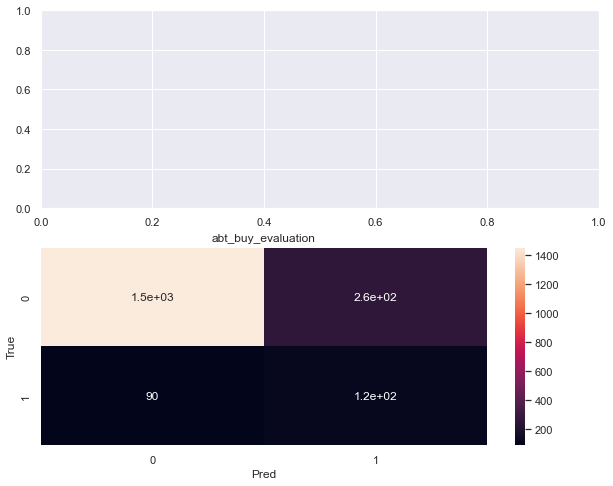

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.set()
 
f, (ax1,ax2) = plt.subplots(figsize = (10, 8),nrows=2)
C2= confusion_matrix(real_test, pre_list, labels=[0, 1])
print(C2)
print(C2.ravel())
sns.heatmap(C2,annot=True)
 
ax2.set_title('abt_buy_evaluation')
ax2.set_xlabel('Pred')
ax2.set_ylabel('True')
#f.savefig('sns_heatmap_confusion_matrix.jpg', bbox_inches='tight')

In [15]:
print("\nDetails of abt_buy =\n",classification_report(real_test, pre_list))


Details of abt_buy =
               precision    recall  f1-score   support

           0       0.94      0.85      0.89      1710
           1       0.31      0.56      0.40       206

    accuracy                           0.82      1916
   macro avg       0.63      0.71      0.65      1916
weighted avg       0.87      0.82      0.84      1916



amazon_google

In [16]:
amazon_google_train = pd.read_csv("C:/project/final_data/amazon_google/train.tsv", sep="\t")
amazon_google_train

,idx,text_left,text_right,label
0,0,microsoft visio standard 2007 version upgrade ...,adobe cs3 design standard upgrade 413.99,0
1,1,microsoft mappoint 2006 with gps microsoft 349.0,microsoft student with encarta premium 2008 co...,0
2,2,adobe after effects professional 7.0 adobe 999.0,adobe flash cs3 professional ( mac ) 699.0,0
3,3,motu digital performer 5 digital audio softwar...,motu digital performer dp5 software music prod...,1
4,4,illustrator cs3 13 mac ed 1u adobe-education-b...,adobe illustrator cs3 for mac academic adobe-e...,1
...,...,...,...,...
6869,6869,microsoft visual studio team suite 2005 with m...,f1q-00302 microsoft visual studio 2005 profess...,0
6870,6870,microsoft word 2004 upgrade ( mac ) microsoft ...,microsoft b21-00806 ae mappoint 2006 cd 50.39,0
6871,6871,adobe after effects professional 7.0 adobe 999.0,15510669dm adobe after effects cs3 professiona...,0
6872,6872,system care professional avanquest 49.95,microsoft office and windows training professi...,0


In [17]:
amazon_google_test = pd.read_csv("C:/project/final_data/amazon_google/test.tsv", sep="\t")
amazon_google_test

,idx,text_left,text_right,label
0,0,microsoft visual studio test agent 2005 cd 1 p...,individual software professor teaches microsof...,0
1,1,adobe dreamweaver cs3 [ mac ] adobe 399.0,adobe cs3 web premium 1659.99,0
2,2,instant immersion spanish 2.0 topics entertain...,instant immers japanese dlx 2 . 36.11,0
3,3,i transfer dvds 2 ipod edition ( win/mac ) me-...,ghost recon gold edition ( dvd-rom ) 20.95,0
4,4,adobe flash pro cs3 upgrade [ mac ] adobe 199.0,adobe illustrator cs3 ( mac ) 599.0,0
...,...,...,...,...
2288,2288,instant immersion german audio topics entertai...,instant immers french dlx 2 27.57,0
2289,2289,adobe flash pro cs3 [ mac ] adobe 699.0,38039295dm adobe flash cs3 professional v. 9 m...,0
2290,2290,let 's learn about time & date selectsoft publ...,it 's about time products learn the switch to ...,0
2291,2291,quicken legal business pro 2007 nolo press 79.99,quickbooks ( r ) pro 2007 179.99,0


In [18]:
dist_amazon_google_train = getDistance(amazon_google_train['text_left'], amazon_google_train['text_right'])

In [19]:
threshold_list = np.linspace(0,1,101)
real = toInt(amazon_google_train['label'])
max_f = 0
max_t = 0
for i in range(len(threshold_list)):
    pre_list = prediction(dist_amazon_google_train, threshold_list[i])
    pre = toInt(pre_list)
    f = f1_score(real, pre, average='binary')
    if f>max_f:
        max_f = f
        max_t = threshold_list[i]
    print(f)

0.0
0.002857142857142857
0.002857142857142857
0.002857142857142857
0.005706134094151213
0.011379800853485063
0.022535211267605635
0.03081232492997199
0.04722222222222222
0.058011049723756904
0.08695652173913043
0.11512717536813924
0.13720316622691292
0.17503217503217502
0.21223470661672905
0.22926829268292684
0.26210153482880755
0.2903225806451613
0.303030303030303
0.3271537622682661
0.3459915611814346
0.37989949748743723
0.39571150097465885
0.4194756554307116
0.4397537379067722
0.4562289562289562
0.4600484261501211
0.470679012345679
0.48145454545454547
0.49480249480249483
0.49184605348988913
0.48883374689826303
0.4845300642148278
0.4860120680197476
0.4720496894409938
0.4577259475218659
0.45098941555453287
0.4455017301038062
0.4372701266857376
0.4272445820433437
0.41930729550479
0.4112931334959916
0.4018598472268349
0.38992125984251963
0.3763440860215054
0.3594235659790902
0.34167110164981374
0.3275
0.3116576022700402
0.29491450144348214
0.2813159004639393
0.2679177480535037
0.25691549

In [20]:
print(max_f)
print(max_t)

0.49480249480249483
0.29


In [21]:
dist_amazon_google_test = getDistance(amazon_google_test['text_left'], amazon_google_test['text_right'])

In [22]:
real_test = toInt(amazon_google_test['label'])
pre_list = prediction(dist_amazon_google_test, max_t)
pre = toInt(pre_list)
f = f1_score(real_test, pre, average='binary')
print(f)

0.5030674846625767


[[1927  132]
 [ 111  123]]
[1927  132  111  123]


Text(66.5, 0.5, 'True')

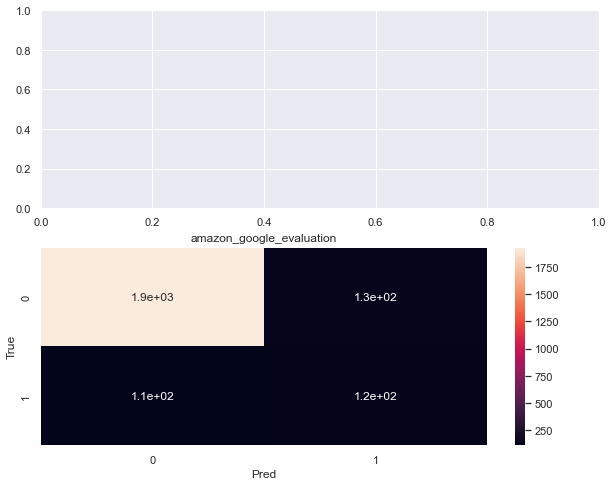

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.set()
 
f, (ax1,ax2) = plt.subplots(figsize = (10, 8),nrows=2)
C2= confusion_matrix(real_test, pre_list, labels=[0, 1])
print(C2)
print(C2.ravel())
sns.heatmap(C2,annot=True)
 
ax2.set_title('amazon_google_evaluation')
ax2.set_xlabel('Pred')
ax2.set_ylabel('True')
#f.savefig('sns_heatmap_confusion_matrix.jpg', bbox_inches='tight')

In [24]:
print("\nDetails of amazon_google =\n",classification_report(real_test, pre_list))


Details of amazon_google =
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      2059
           1       0.48      0.53      0.50       234

    accuracy                           0.89      2293
   macro avg       0.71      0.73      0.72      2293
weighted avg       0.90      0.89      0.90      2293

